<h1> Dataset 3</h1>

<h2>1. Data Exploration</h2>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TrainData3.txt', sep='\s+', header = None)
labels = pd.read_csv('TrainLabel3.txt', header=None, names=['target'])
df['target'] = labels['target']
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,2,1.0,5,4.0,5.0,5.000000e+00,3,3.0,0,1.0,1.0,7.0,1.000000e+99,9
1,1,1.0,5,5.0,5.0,5.000000e+00,3,5.0,2,1.0,1.0,7.0,1.000000e+00,9
2,2,1.0,3,5.0,1.0,5.000000e+00,2,3.0,1,2.0,3.0,7.0,1.000000e+00,9
3,2,5.0,1,2.0,6.0,5.000000e+00,1,4.0,2,3.0,1.0,7.0,1.000000e+00,1
4,2,5.0,1,2.0,6.0,3.000000e+00,1,4.0,2,3.0,1.0,7.0,1.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,1,5.0,4,5.0,3.0,1.000000e+99,1,1.0,0,2.0,3.0,7.0,1.000000e+00,7
6296,2,1.0,3,3.0,9.0,1.000000e+99,3,4.0,2,1.0,1.0,8.0,1.000000e+00,9
6297,2,1.0,4,4.0,6.0,5.000000e+00,3,4.0,2,1.0,1.0,7.0,1.000000e+00,5
6298,1,3.0,3,4.0,1.0,5.000000e+00,1,1.0,0,1.0,1.0,7.0,1.000000e+00,9


In [3]:
df['target'].value_counts()

target
1    1235
8     912
6     777
7     677
9     596
4     566
2     554
5     495
3     488
Name: count, dtype: int64

In [4]:
missing_mask = df == 1e99
print(max(df[missing_mask].count()))

703


<h2>1.a. Data Quality Report</h2>

In [5]:
def data_quality_report(df):
    report_data = []
    for i, column in enumerate(df.columns, 1):
        data = df[column]
        
        # Replace 1e99 with NaN for calculations
        data_clean = data.replace(1e99, np.nan)
        
        # Calculate statistics
        count = len(data)
        missing = (data == 1e99).sum()
        missing_percentage = (missing / count) * 100
        cardinality = data_clean.nunique()
        min_val = data_clean.min()
        q1 = data_clean.quantile(0.25)
        median = data_clean.median()
        q3 = data_clean.quantile(0.75)
        max_val = data_clean.max()
        mean = data_clean.mean()
        std_dev = data_clean.std()
        
        report_data.append({
            'Feature No.': i,
            'Count': count,
            '% of Missing': round(missing_percentage, 2),
            'Cardinality': cardinality,
            'Min.': min_val,
            'Q1': q1,
            'Median': median,
            'Q3': q3,
            'Max.': max_val,
            'Mean': mean,
            'Std. Dev.': std_dev
        })
    
    # Create a DataFrame from the collected data
    report_df = pd.DataFrame(report_data)
    
    return report_df

# Assuming your original DataFrame is named 'df'
quality_report_df = data_quality_report(df)

quality_report_df

,Feature No.,Count,% of Missing,Cardinality,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
0,1,6300,0.00,2,1.0,1.0,2.0,2.0,2.0,1.549524,0.497581
1,2,6300,1.51,5,1.0,1.0,3.0,5.0,5.0,3.012571,1.814984
2,3,6300,0.00,7,1.0,2.0,3.0,4.0,7.0,3.418889,1.638730
3,4,6300,0.84,6,1.0,3.0,4.0,5.0,6.0,3.820874,1.221312
4,5,6300,1.48,9,1.0,1.0,4.0,6.0,9.0,3.785887,2.546710
5,6,6300,11.16,5,1.0,4.0,5.0,5.0,5.0,4.197249,1.230294
6,7,6300,0.00,3,1.0,1.0,1.0,2.0,3.0,1.565556,0.750290
7,8,6300,4.03,9,1.0,2.0,3.0,4.0,9.0,2.891168,1.559750
8,9,6300,0.00,10,0.0,0.0,0.0,1.0,9.0,0.687619,1.113729
9,10,6300,2.81,3,1.0,1.0,2.0,2.0,3.0,1.826719,0.746455


<h2>1.b. Data Visualization</h2>

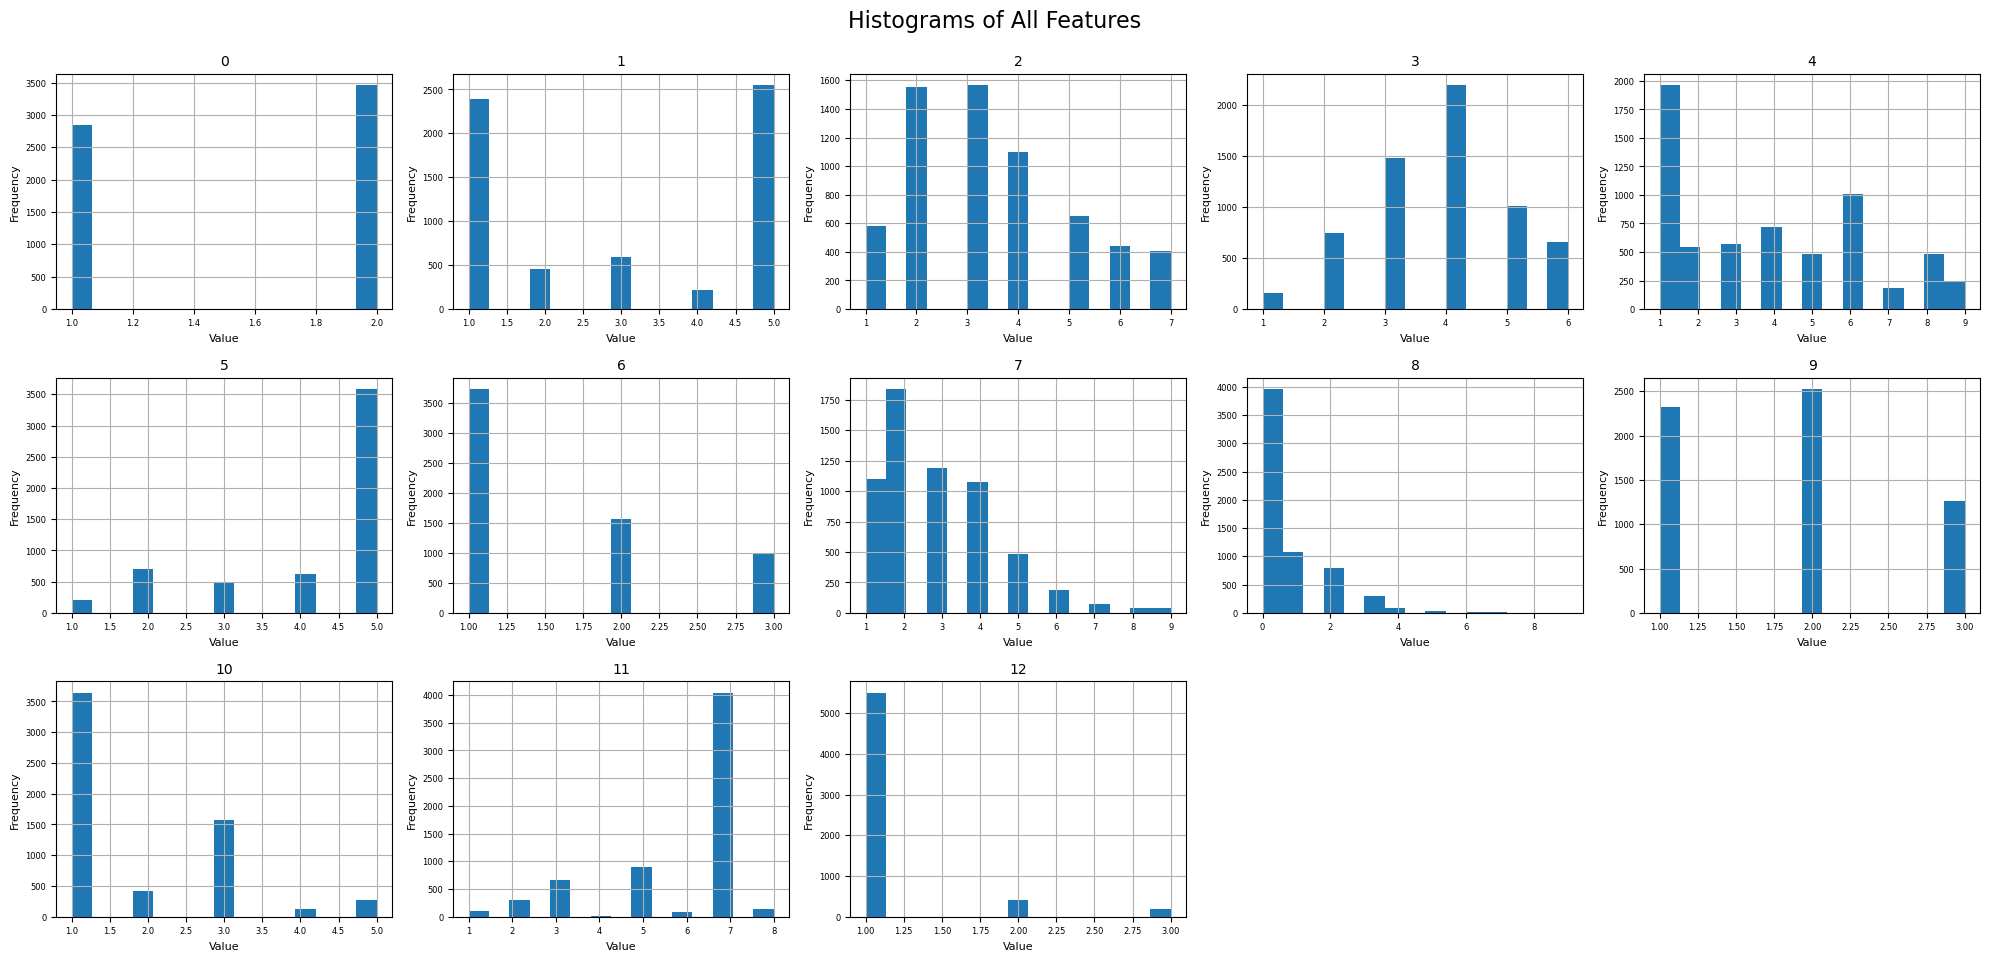

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.replace(1e99, np.nan)

# Get all column names except the last one (assuming the last column is the target)
feature_columns = df.columns[:-1]

# Set up the plot
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed

# Plot histograms for each feature
for i, column in enumerate(feature_columns, 1):
    plt.subplot(5, 5, i)  # Adjust the grid size (5x5) based on your number of features
    df[column].hist(bins=15)
    plt.title(column, fontsize=10)
    plt.xlabel('Value', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.tick_params(labelsize=6)

plt.tight_layout()
plt.suptitle('Histograms of All Features', fontsize=16, y=1.02)
plt.show()

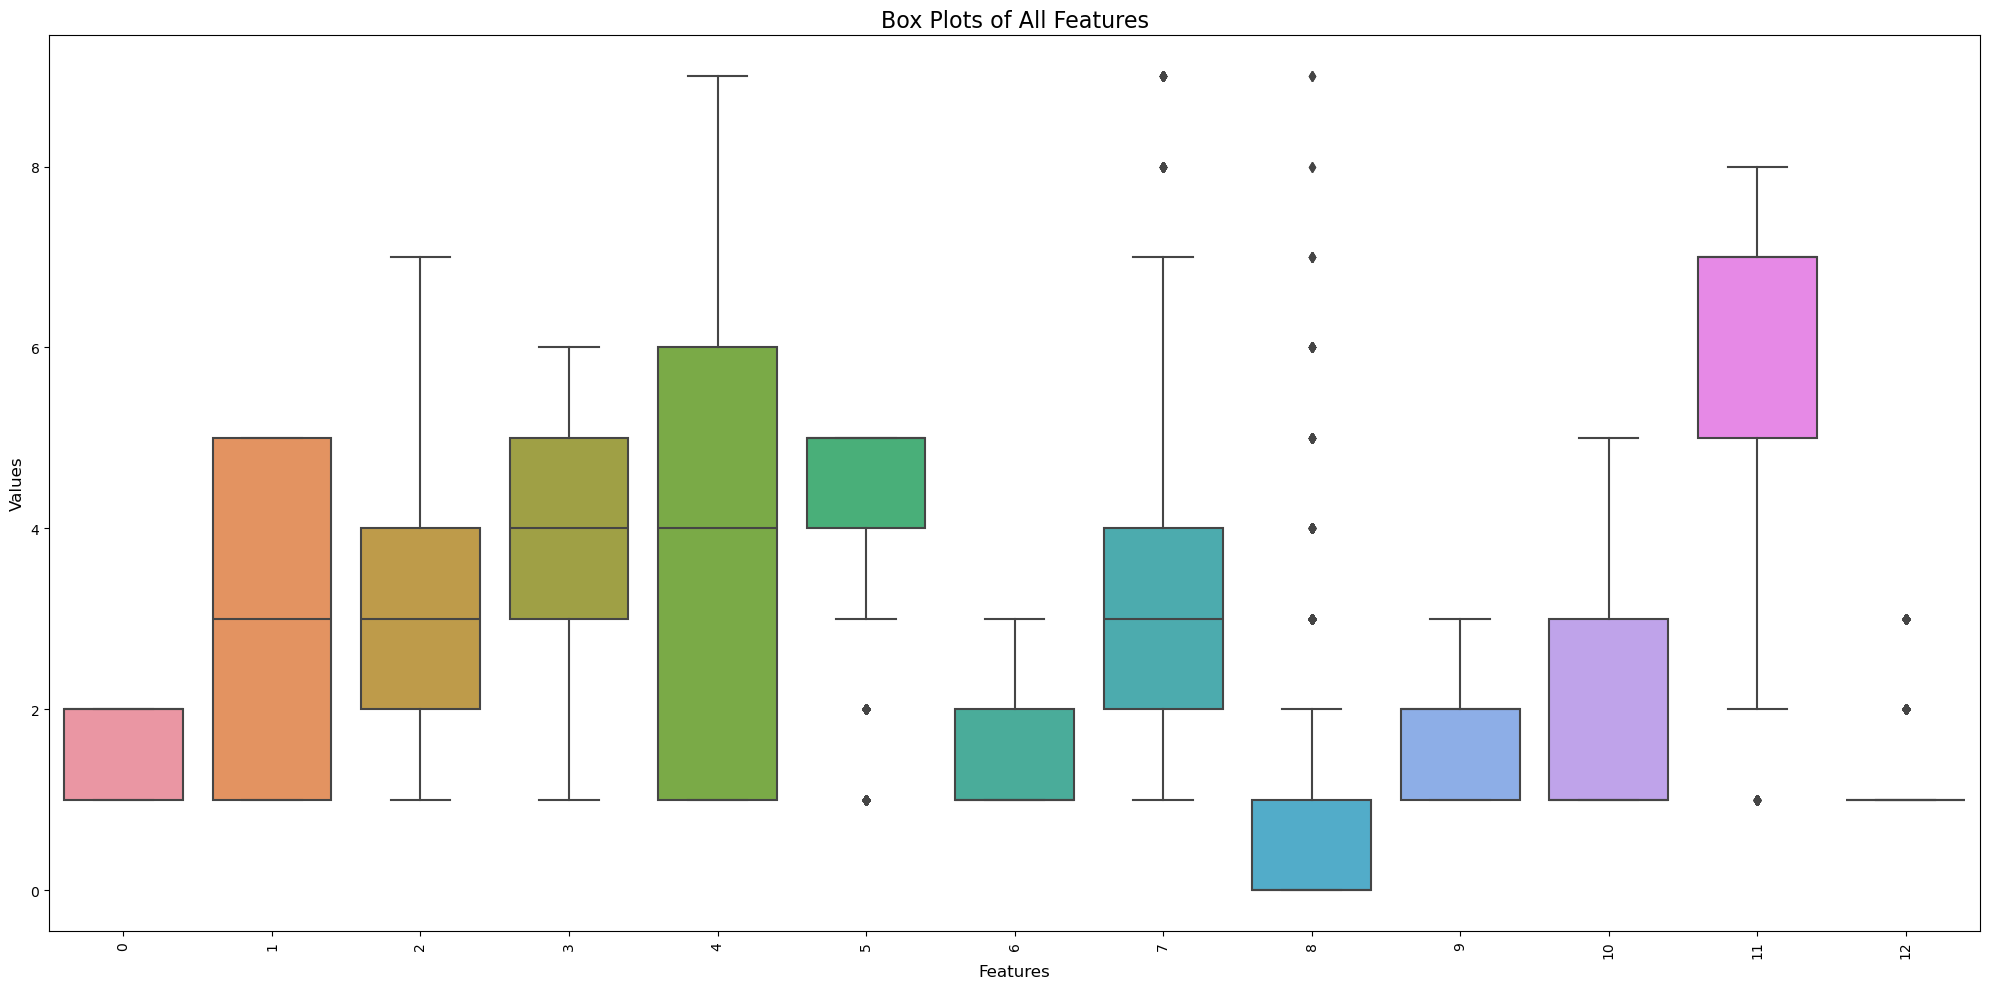

In [7]:
feature_columns = df.columns[:-1]

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(df[feature_columns], var_name='Feature', value_name='Value')

# Set up the plot
plt.figure(figsize=(20, 10))

# Create the box plot
sns.boxplot(x='Feature', y='Value', data=df_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Box Plots of All Features', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

In [9]:
# # Step 1: Handle Outliers (using IQR method)
# def handle_outliers_iqr(X):
#     X_cleaned = X.copy()
#     for column in X.columns:
#         Q1 = X[column].quantile(0.25)
#         Q3 = X[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Winsorization
#         X_cleaned[column] = np.clip(X_cleaned[column], lower_bound, upper_bound)
    
#     return X_cleaned

# X_cleaned = handle_outliers_iqr(X)

In [10]:
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=X_cleaned)
# plt.title('Boxplots of Features in X_cleaned')
# plt.xlabel('Features')
# plt.ylabel('Values')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0. , -0.5,  1. , ...,  0. ,  0. ,  nan],
       [-1. , -0.5,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. , ...,  1. ,  0. ,  0. ],
       ...,
       [ 0. , -0.5,  0.5, ...,  0. ,  0. ,  0. ],
       [-1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-1. , -0.5, -0.5, ...,  1. ,  0. ,  0. ]])

In [12]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=7, weights='uniform')
df_imputed = pd.DataFrame(imputer.fit_transform(X_scaled))

df_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,-0.5,1.0,0.0,0.2,0.000000,2.0,0.0,0.0,-1.0,0.0,0.0,0.0
1,-1.0,-0.5,1.0,0.5,0.2,0.000000,2.0,1.0,2.0,-1.0,0.0,0.0,0.0
2,0.0,-0.5,0.0,0.5,-0.6,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.5,-1.0,-1.0,0.4,0.000000,0.0,0.5,2.0,1.0,0.0,0.0,0.0
4,0.0,0.5,-1.0,-1.0,0.4,-2.000000,0.0,0.5,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,-1.0,0.5,0.5,0.5,-0.2,-1.142857,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
6296,0.0,-0.5,0.0,-0.5,1.0,-1.000000,2.0,0.5,2.0,-1.0,0.0,0.5,0.0
6297,0.0,-0.5,0.5,0.0,0.4,0.000000,2.0,0.5,2.0,-1.0,0.0,0.0,0.0
6298,-1.0,0.0,0.0,0.0,-0.6,0.000000,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [13]:
quality_report_df_imputed = data_quality_report(df_imputed)

quality_report_df_imputed

,Feature No.,Count,% of Missing,Cardinality,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
0,1,6300,0.0,2,-1.0,-1.000000,0.0,0.0,0.0,-0.450476,0.497581
1,2,6300,0.0,21,-0.5,-0.500000,0.0,0.5,0.5,0.000635,0.453449
2,3,6300,0.0,7,-1.0,-0.500000,0.0,0.5,2.0,0.209444,0.819365
3,4,6300,0.0,21,-1.5,-0.500000,0.0,0.5,1.0,-0.090737,0.609469
4,5,6300,0.0,64,-0.6,-0.600000,0.0,0.4,1.0,-0.043202,0.507112
5,6,6300,0.0,23,-4.0,-1.142857,0.0,0.0,0.0,-0.799274,1.177791
6,7,6300,0.0,3,0.0,0.000000,0.0,1.0,2.0,0.565556,0.750290
7,8,6300,0.0,33,-1.0,-0.500000,0.0,0.5,3.0,-0.066633,0.772099
8,9,6300,0.0,10,0.0,0.000000,0.0,1.0,9.0,0.687619,1.113729
9,10,6300,0.0,15,-1.0,-1.000000,0.0,0.0,1.0,-0.172971,0.739450


In [34]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Information Gain
info_gain = mutual_info_classif(df_imputed, y)  # Set discrete_features=True for categorical features

# Create a DataFrame to display results
info_gain_results = pd.DataFrame({
    'Feature': df_imputed.columns,
    'Information Gain': info_gain
}).sort_values(by='Information Gain', ascending=False)

print(info_gain_results)

    Feature  Information Gain
2         2          0.202431
4         4          0.189210
9         9          0.185458
1         1          0.150016
3         3          0.135272
6         6          0.105801
7         7          0.061282
10       10          0.058536
8         8          0.028346
12       12          0.015750
5         5          0.015713
11       11          0.014288
0         0          0.000000


In [35]:
from sklearn.feature_selection import f_classif

# Calculate Fisher's score (ANOVA F-value)
fisher_scores, _ = f_classif(df_imputed, y)

# Create a DataFrame to display results
fisher_results = pd.DataFrame({
    'Feature': df_imputed.columns,
    'Fisher Score': fisher_scores
}).sort_values(by='Fisher Score', ascending=False)

print(fisher_results)

    Feature  Fisher Score
9         9    304.496882
1         1    222.218083
3         3    215.549959
2         2    168.285990
4         4    131.153447
6         6    127.483379
10       10     60.874564
7         7     41.380417
8         8     31.610901
11       11     13.106804
5         5     10.398517
12       12     10.179970
0         0      2.691261


<h2> 3. Training and Evaluation </h2>

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_imputed, y, train_size=0.7, random_state=42, stratify=y)

X_train.shape, X_test.shape

((4410, 13), (1890, 13))

In [16]:

# Check the class distribution in the training set
print("Original training set class distribution:")
print(np.unique(y_train, return_counts=True))

Original training set class distribution:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([864, 388, 342, 396, 347, 544, 474, 638, 417]))


In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [19]:
print("Updated training set class distribution:")
print(np.unique(y_train, return_counts=True))

Updated training set class distribution:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([342, 342, 342, 342, 342, 342, 342, 342, 342]))


<h3>3.b. Random Forest</h3>

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Step 1: Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 2: Create the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 3: Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=4, scoring='f1_macro', n_jobs=-1, verbose=2)

# Step 4: Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best model
best_xgb = grid_search.best_estimator_

# Step 6: Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Step 7: Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Step 8: Calculate and print various metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")

# Step 9: Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.3254
F1 Score (macro): 0.2891
Precision (macro): 0.2908
Recall (macro): 0.2950

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       371
           1       0.19      0.32      0.24       166
           2       0.20      0.18      0.19       146
           3       0.19      0.18      0.19       170
           4       0.23      0.24      0.23       148
           5       0.26      0.19      0.22       233
           6       0.24      0.22      0.23       203
           7       0.31      0.24      0.27       274
           8       0.34      0.45      0.39       179

    accuracy                           0.33      1890
   macro avg       0.29      0.29      0.29      1890
weighted avg       0.33      0.33      0.32      189

<h3>3.c. XG Boost</h3>

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Step 1: Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 2: Create the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 3: Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# Step 4: Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best model
best_xgb = grid_search.best_estimator_

# Step 6: Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Step 7: Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Step 8: Calculate and print various metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")

# Step 9: Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.3206
F1 Score (macro): 0.2762
Precision (macro): 0.2771
Recall (macro): 0.2848

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       371
           1       0.21      0.36      0.26       166
           2       0.11      0.09      0.10       146
           3       0.20      0.21      0.20       170
           4       0.22      0.20      0.21       148
           5       0.23      0.19      0.21       233
           6       0.24      0.17      0.20       203
           7       0.31      0.25      0.28       274
           8       0.33      0.45      0.38       179

    accuracy                           0.32      1890
   macro avg       0.28      0.28      0.28      1890
weighted avg       0.32      0.32      0.32      18

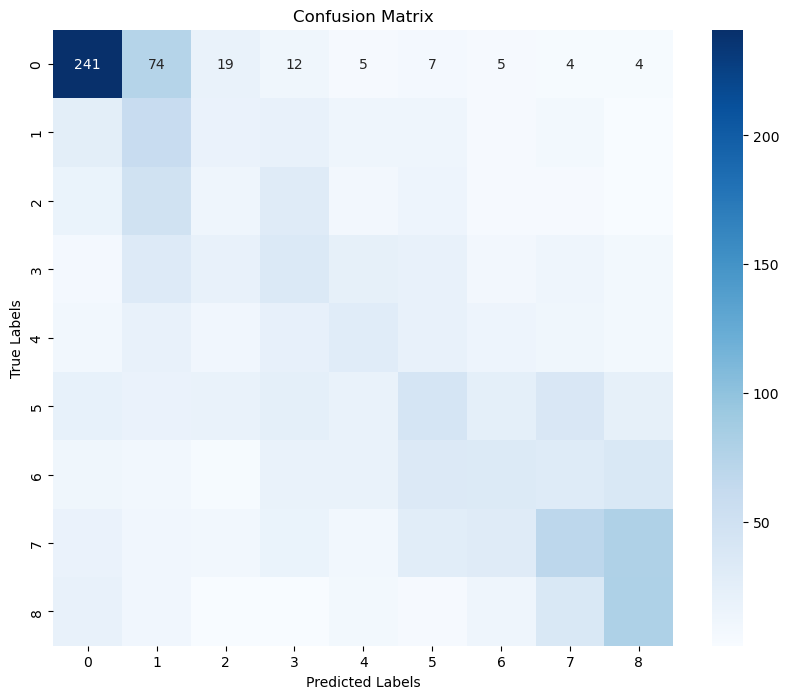

array([[241,  74,  19,  12,   5,   7,   5,   4,   4],
       [ 27,  59,  18,  20,  13,  14,   5,   8,   2],
       [ 17,  49,  13,  31,   9,  15,   5,   5,   2],
       [  7,  33,  20,  36,  23,  20,   9,  14,   8],
       [ 10,  20,  11,  22,  30,  20,  15,  12,   8],
       [ 21,  18,  19,  25,  19,  44,  25,  39,  23],
       [ 12,  10,   4,  19,  19,  35,  34,  32,  38],
       [ 18,  11,  10,  17,  10,  29,  31,  69,  79],
       [ 20,  11,   2,   2,   8,   5,  13,  38,  80]])

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Step 3: Add labels and title to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
cm

<h3>3.d. KNN</h3>

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.2544973544973545

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       371
           1       0.16      0.31      0.21       166
           2       0.15      0.25      0.19       146
           3       0.10      0.12      0.11       170
           4       0.10      0.11      0.10       148
           5       0.15      0.11      0.13       233
           6       0.15      0.08      0.11       203
           7       0.32      0.10      0.15       274
           8       0.39      0.28      0.33       179

    accuracy                           0.25      1890
   macro avg       0.23      0.22      0.21      1890
weighted avg       0.26      0.25      0.24      1890

